Background: Daily user data of the platform in a month

Objective: To conduct a weekly cohort performance comparison between new users and returning users

In [1]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cohorts = pd.read_csv('cohorts.csv')
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             30 non-null     object 
 1   New users        30 non-null     int64  
 2   Returning users  30 non-null     int64  
 3   Duration Day 1   30 non-null     float64
 4   Duration Day 7   30 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


In [3]:
cohorts.head()

,Date,New users,Returning users,Duration Day 1,Duration Day 7
0,25/10/2023,3461,1437,202.156977,162.523809
1,26/10/2023,3777,1554,228.631944,258.147059
2,27/10/2023,3100,1288,227.185841,233.550000
3,28/10/2023,2293,978,261.079545,167.357143
4,29/10/2023,2678,1082,182.567568,304.350000


In [4]:
cohorts['Date'] = pd.to_datetime(cohorts['Date'], format='%d/%m/%Y')
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             30 non-null     datetime64[ns]
 1   New users        30 non-null     int64         
 2   Returning users  30 non-null     int64         
 3   Duration Day 1   30 non-null     float64       
 4   Duration Day 7   30 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 1.3 KB


In [5]:
descriptive_stats = cohorts.describe()
print(descriptive_stats)

         New users  Returning users  Duration Day 1  Duration Day 7
count    30.000000        30.000000       30.000000       30.000000
mean   3418.166667      1352.866667      208.259594      136.037157
std     677.407486       246.793189       64.730830       96.624319
min    1929.000000       784.000000       59.047619        0.000000
25%    3069.000000      1131.500000      182.974287       68.488971
50%    3514.500000      1388.000000      206.356554      146.381667
75%    3829.500000      1543.750000      230.671046      220.021875
max    4790.000000      1766.000000      445.872340      304.350000


In [6]:
'''fig = go.Figure()
for col in ['New users', 'Returning users']:
        fig.add_trace(go.Scatter(
            x=cohorts['Date'],
            y=cohorts[col],
            mode='lines+markers',
            name=col))
fig.update_layout(title='Trend of New and Returning Users Over Time',
                  xaxis_title='Date',
                  yaxis_title='Number of Users')
fig.show()'''

"fig = go.Figure()\nfor col in ['New users', 'Returning users']:\n        fig.add_trace(go.Scatter(\n            x=cohorts['Date'],\n            y=cohorts[col],\n            mode='lines+markers',\n            name=col))\nfig.update_layout(title='Trend of New and Returning Users Over Time',\n                  xaxis_title='Date',\n                  yaxis_title='Number of Users')\nfig.show()"

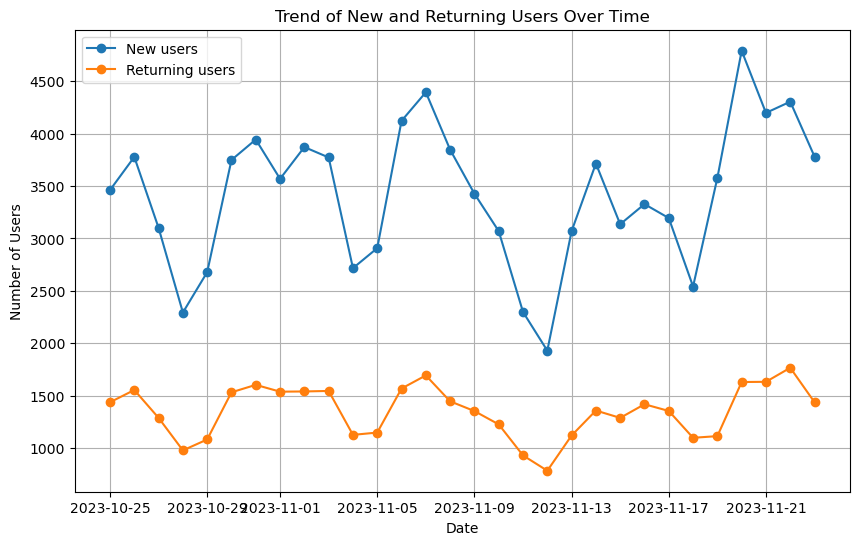

In [7]:
fig, ax = plt.subplots(figsize=(10, 6))
for col in ['New users', 'Returning users']:
    ax.plot(cohorts['Date'], cohorts[col], marker='o', label=col)
ax.set_title('Trend of New and Returning Users Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Number of Users')
ax.legend()
plt.grid(True)
plt.show()

New users are about double of the returning users everyday. The trend of new users and returning users are similar, which indicates that there is a strong relationship between the two.

In [8]:
'''fig = go.Figure()
for col in ['Duration Day 1', 'Duration Day 7']:
        fig.add_trace(go.Scatter(
            x=cohorts['Date'],
            y=cohorts[col],
            mode='lines+markers',
            name=col))
fig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time',
                  xaxis_title='Date',
                  yaxis_title='Duration')
fig.show()'''

"fig = go.Figure()\nfor col in ['Duration Day 1', 'Duration Day 7']:\n        fig.add_trace(go.Scatter(\n            x=cohorts['Date'],\n            y=cohorts[col],\n            mode='lines+markers',\n            name=col))\nfig.update_layout(title='Trend of Duration (Day 1 and Day 7) Over Time',\n                  xaxis_title='Date',\n                  yaxis_title='Duration')\nfig.show()"

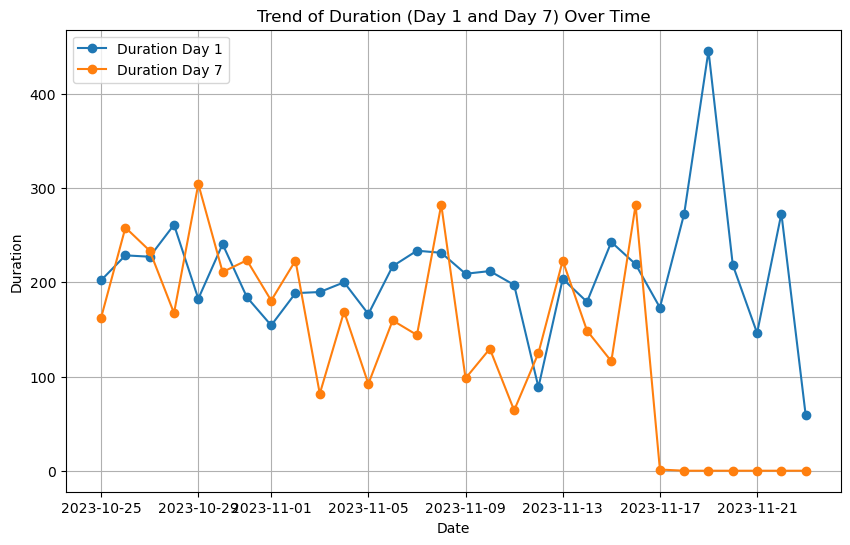

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
for col in ['Duration Day 1', 'Duration Day 7']:
    ax.plot(cohorts['Date'], cohorts[col], marker='o', label=col)
ax.set_title('Trend of Duration (Day 1 and Day 7) Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Duration')
ax.legend()
plt.grid(True)
plt.show()

In [10]:
'''corr = cohorts.corr()
fig = go.Figure(data=go.Heatmap(z=corr.values,
                                x=corr.columns,
                                y=corr.columns,
                                colorscale='RdBu_r',
                                text=corr.round(2).values, 
                                texttemplate='%{text}', 
                                textfont={'size': 12}))
fig.update_layout(title='Correlation Matrix of Variables')'''

"corr = cohorts.corr()\nfig = go.Figure(data=go.Heatmap(z=corr.values,\n                                x=corr.columns,\n                                y=corr.columns,\n                                colorscale='RdBu_r',\n                                text=corr.round(2).values, \n                                texttemplate='%{text}', \n                                textfont={'size': 12}))\nfig.update_layout(title='Correlation Matrix of Variables')"

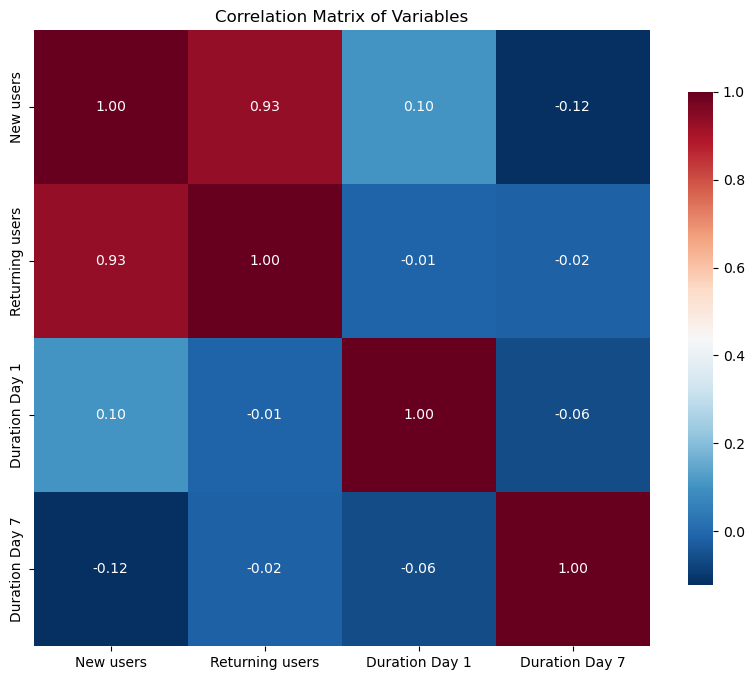

In [11]:
corr = cohorts.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, 
            annot=True, 
            fmt=".2f", 
            cmap='RdBu_r', 
            square=True,
            cbar_kws={'shrink': 0.8})  
plt.title('Correlation Matrix of Variables')
plt.show()

A positive correlation between new users and returning users (0.93) suggests that when returning users rises, the new users tends to rises very strongly.

Conversely, the other categories show relatively lower correlations with other categories, which indicates more independent or variable result in these areas.

In [12]:
cohorts['Week'] = cohorts['Date'].dt.isocalendar().week.astype(str).str.zfill(2)
cohorts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             30 non-null     datetime64[ns]
 1   New users        30 non-null     int64         
 2   Returning users  30 non-null     int64         
 3   Duration Day 1   30 non-null     float64       
 4   Duration Day 7   30 non-null     float64       
 5   Week             30 non-null     object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 1.5+ KB


In [13]:
weekly_averages = pd.pivot_table(cohorts, index='Week', values=['New users', 'Returning users', 'Duration Day 1', 'Duration Day 7'], 
                                 aggfunc='mean', fill_value=0)
weekly_averages.reset_index(inplace=True)
weekly_averages.columns.name = None
weekly_averages.index.name = None
weekly_averages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Week             5 non-null      object 
 1   Duration Day 1   5 non-null      float64
 2   Duration Day 7   5 non-null      float64
 3   New users        5 non-null      float64
 4   Returning users  5 non-null      float64
dtypes: float64(4), object(1)
memory usage: 328.0+ bytes


In [14]:
'''fig = go.Figure()
for col in ['New users', 'Returning users']:
        fig.add_trace(go.Scatter(
            x=weekly_averages['Week'],
            y=weekly_averages[col],
            mode='lines+markers',
            name=col))
fig.update_layout(title='Weekly Average of New vs. Returning Users',
                  xaxis_title='Week of the Year',
                  yaxis_title='Average Number of Users')
fig.show()'''

"fig = go.Figure()\nfor col in ['New users', 'Returning users']:\n        fig.add_trace(go.Scatter(\n            x=weekly_averages['Week'],\n            y=weekly_averages[col],\n            mode='lines+markers',\n            name=col))\nfig.update_layout(title='Weekly Average of New vs. Returning Users',\n                  xaxis_title='Week of the Year',\n                  yaxis_title='Average Number of Users')\nfig.show()"

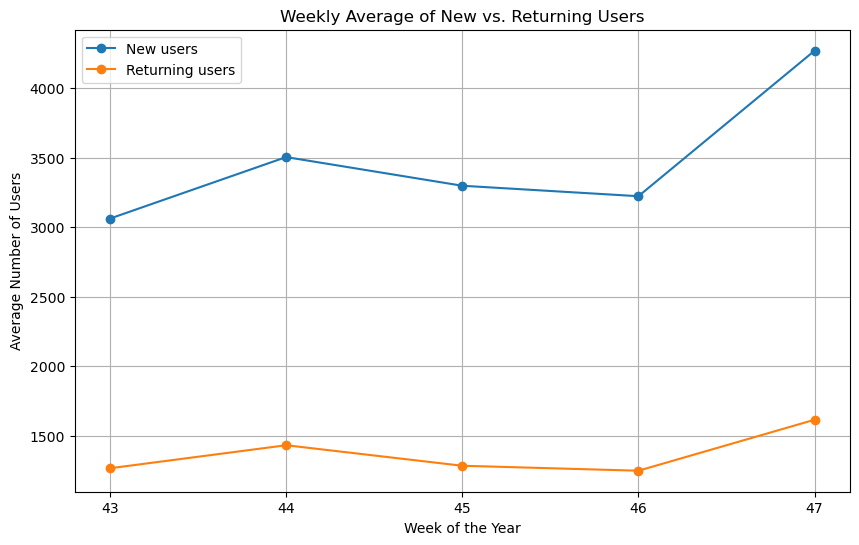

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))
for col in ['New users', 'Returning users']:
    ax.plot(weekly_averages['Week'], weekly_averages[col], marker='o', label=col)
ax.set_title('Weekly Average of New vs. Returning Users')
ax.set_xlabel('Week of the Year')
ax.set_ylabel('Average Number of Users')
ax.legend()
plt.grid(True)
plt.show()

The trend of average new users and returning users per week are similar except for Week 47. The average number of new users increase a lot compared to the average number of returning users in Week 47, which indicating that there is a promotion for new users.

In [16]:
'''fig = go.Figure()
for col in ['Duration Day 1', 'Duration Day 7']:
        fig.add_trace(go.Scatter(
            x=weekly_averages['Week'],
            y=weekly_averages[col],
            mode='lines+markers',
            name=col))
fig.update_layout(title='Weekly Average of Duration (Day 1 vs. Day 7)',
                  xaxis_title='Week of the Year',
                  yaxis_title='Average Duration')
fig.show()'''

"fig = go.Figure()\nfor col in ['Duration Day 1', 'Duration Day 7']:\n        fig.add_trace(go.Scatter(\n            x=weekly_averages['Week'],\n            y=weekly_averages[col],\n            mode='lines+markers',\n            name=col))\nfig.update_layout(title='Weekly Average of Duration (Day 1 vs. Day 7)',\n                  xaxis_title='Week of the Year',\n                  yaxis_title='Average Duration')\nfig.show()"

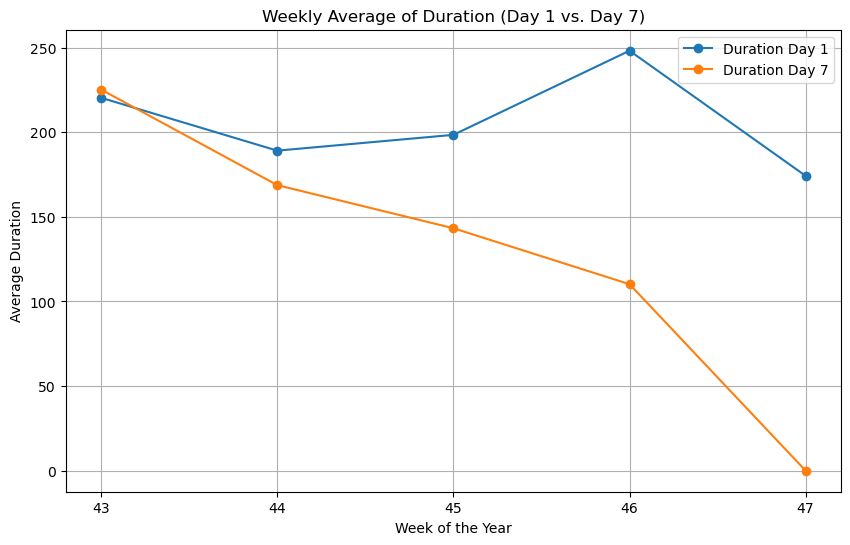

In [17]:
fig, ax = plt.subplots(figsize=(10, 6))
for col in ['Duration Day 1', 'Duration Day 7']:
    ax.plot(weekly_averages['Week'], weekly_averages[col], marker='o', label=col)
ax.set_title('Weekly Average of Duration (Day 1 vs. Day 7)')
ax.set_xlabel('Week of the Year')
ax.set_ylabel('Average Duration')
ax.legend()
plt.grid(True)
plt.show()

The average duration of Day 7 is always lower than Day 1 except for Week 43. The data is showing engagement decay. It means the user who spent X seconds on Day 1 only spent Y seconds on Day 7 (Y < X). The same group of people are less engaged one week later.

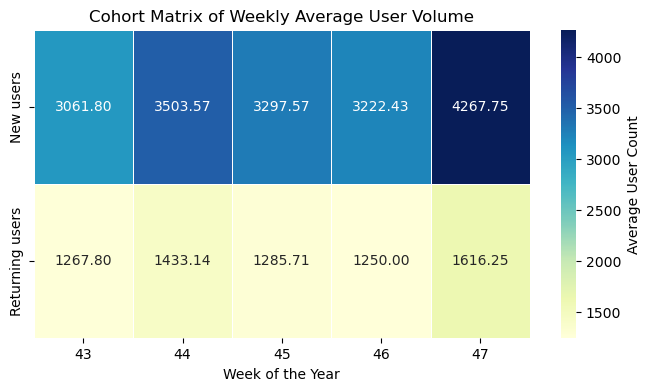

In [18]:
user_averages = weekly_averages[['Week', 'New users', 'Returning users']]
user_averages = user_averages.set_index('Week')[['New users', 'Returning users']]
user_averages = user_averages.T

plt.figure(figsize=(8, 4))
sns.heatmap(
    user_averages,
    annot=True,
    cmap='YlGnBu', 
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Average User Count'}
)
plt.title('Cohort Matrix of Weekly Average User Volume')
plt.xlabel('Week of the Year')
plt.show()

In every week, New Users are significantly more than Returning Users. Week 47 is the highest for both the New Users and Returning Users rows. This is indicating that a major external event occurred and drove a massive surge in the number of new users.

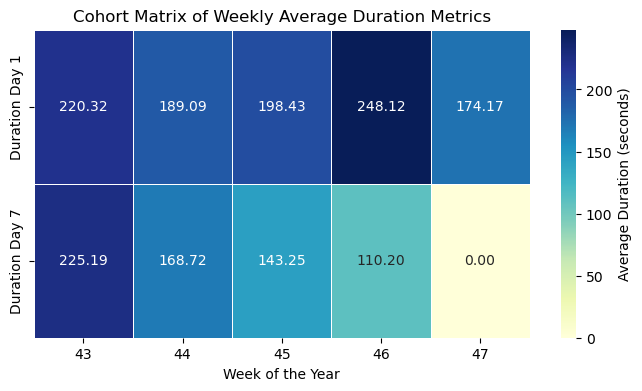

In [19]:
duration_averages = weekly_averages[['Week', 'Duration Day 1', 'Duration Day 7']]
duration_averages = duration_averages.set_index('Week')[['Duration Day 1', 'Duration Day 7']]
duration_averages = duration_averages.T

plt.figure(figsize=(8, 4))
sns.heatmap(
    duration_averages,
    annot=True,
    cmap='YlGnBu', 
    fmt=".2f",
    linewidths=.5,
    cbar_kws={'label': 'Average Duration (seconds)'}
)
plt.title('Cohort Matrix of Weekly Average Duration Metrics')
plt.xlabel('Week of the Year')
plt.show()

In almost every week, the Duration Day 7 is significantly lower than the duration on day 1. This demonstrates the expected pattern of engagement decay. This is a normal lifecycle pattern but signals the need to improve the user experience to maintain that initial excitement.

Week 47 shows a relatively low Duration Day 1 compared to other weeks especially for Duration Day 7, which is 0 second. This severe drop suggests these users had extremely poor long-term engagement.

Reference: https://amanxai.com/2023/11/27/cohort-analysis-using-python/